In [1]:
# paths and dictionaries ! 
from os import listdir, path
import xml.etree.ElementTree as ET
from datetime import datetime
import pandas as pd
import numpy as np 
import os as os 
import pandas as pd 
jsonfilespath = r'C:\Users\TQ\Desktop\Thesis_Code\all_traffic' # path for the json files.
dpath = r'C:\Users\TQ\Desktop\Thesis_Code\day_by_day' # path for the new dailyfiles
wpath = r'C:\Users\TQ\Desktop\Thesis_Code\week_by_week' # path for the new weeklyfiles
mpath = r'C:\Users\TQ\Desktop\Thesis_Code\month_by_month' # path for the new monthlyfiles
path_gb_cc_day_time = r'C:\Users\TQ\Desktop\Thesis_Code\daily_data_gb_excel_cc_time'
dpathcjj = r'C:\Users\TQ\Desktop\Thesis_Code\day_by_day_jjm'
mayGB = r'C:\Users\TQ\Desktop\Thesis_Code\MaymissingGB'
dbdf = r'C:\Users\TQ\Desktop\Thesis_Code\dbdf'
wbw = r'C:\Users\TQ\Desktop\Thesis_Code\wbw'
mbm = r'C:\Users\TQ\Desktop\Thesis_Code\mbm'
dbdfc9m2j2jfixoutliners = r'C:\Users\TQ\Desktop\Thesis_Code\dbdfc9m2j2jfixoutliners'
dbdfcperfect = r'C:\Users\TQ\Desktop\Thesis_Code\dbdfcperfect'


def clean_s(df):
    
    df.columns = df.columns.str.replace(' ', '')
    df.columns = df.columns.str.lstrip()
    df.columns = df.columns.str.rstrip()
    df.columns = df.columns.str.strip()
    
    return df

def switch_country(CountryCode):
    switcher = {
        "at1.at": "Austria",
        "be1.be": "Belgium",
        "ch1.ch": "Switzerland",
        "cz1.cz": "Czech Republic",
        "de1.de": "Denmark",
        "es1.es": "Spain",
        "fr1.fr": "France",
        "gr1.gr": "Greece",
        "hr1.hr": "Croatia",
        "hu1.hu": "Hungary",
        "ie1.ie": "Ireland",
        "il1.il": "Israel",
        "it1.it": "Italy",
        "lu1.lu": "Luxembourg",
        "nl1.nl": "Netherlands",
        "ny1.ny": "New York (USA)",
        "pl1.pl": "Poland",
        "pt1.pt": "Portugal",
        "se1.se": "Sweden",
        "si1.si": "Slovenia",
        "sk1.sk": "Slovakia",
        "uk1.uk": "United Kingdom"
    }
    return  switcher.get(CountryCode, "Invalid month")

def country_code(Country):
    countries_dict = {
         "Austria" : 1,
         "Belgium" : 2,
        "Switzerland" : 3 ,
         "Czech Republic" : 4 ,
        "Denmark" : 5 ,
         "Spain" : 6 ,
         "France" : 7 ,
         "Greece" : 8,
         "Croatia" : 9 ,
         "Hungary" : 10,
         "Ireland" :11 ,
         "Israel" : 12 ,
         "Italy" : 13 ,
         "Luxembourg" : 14,
         "Netherlands" : 15  ,
         "New York (USA)" : 16,
         "Poland" : 17,
         "Portugal" : 18 ,
         "Sweden" : 19,
         "Slovenia":20,
         "Slovakia":21,
         "United Kingdom":22
    }
    return  countries_dict.get(Country, "Invalid Country")

def month_code(month):
    months_dict = {
         "05" : "May",
         "06" : "June",
        "07" : "July" ,
         "08" : "August" 

    }
    return  months_dict.get(month, "Invalid Month")

In [70]:
week_by_week_files = {}
files_in_week = 7 
weeknumber = 1
# to weeks
# result in 17 weeks

for fileNumber , jsonfile in enumerate(listdir(dbdfcperfect)):
    if jsonfile.endswith('.csv'):
        fileNumber +=1

        if fileNumber % 7 == 0 : # go to next week 
            week_by_week_key = "Week{}".format(weeknumber)
            if week_by_week_files.get(week_by_week_key) is None: 

                week_by_week_files[week_by_week_key] = []

            week_by_week_files[week_by_week_key].append(jsonfile)

            weeknumber+=1

        else:

            week_by_week_key = "Week{}".format(weeknumber)
            if week_by_week_files.get(week_by_week_key) is None: 

                week_by_week_files[week_by_week_key] = []

            week_by_week_files[week_by_week_key].append(jsonfile)

            if fileNumber % 7 == 0 : # go to next week 
                weeknumber+=1
        

In [71]:
week_by_week_files

{'Week1': ['2005-05-01.csv',
  '2005-05-02.csv',
  '2005-05-03.csv',
  '2005-05-04.csv',
  '2005-05-05.csv',
  '2005-05-06.csv',
  '2005-05-07.csv'],
 'Week2': ['2005-05-08.csv',
  '2005-05-09.csv',
  '2005-05-10.csv',
  '2005-05-11.csv',
  '2005-05-12.csv',
  '2005-05-13.csv',
  '2005-05-14.csv'],
 'Week3': ['2005-05-15.csv',
  '2005-05-16.csv',
  '2005-05-17.csv',
  '2005-05-18.csv',
  '2005-05-19.csv',
  '2005-05-20.csv',
  '2005-05-21.csv'],
 'Week4': ['2005-05-22.csv',
  '2005-05-23.csv',
  '2005-05-24.csv',
  '2005-05-25.csv',
  '2005-05-26.csv',
  '2005-05-27.csv',
  '2005-05-28.csv'],
 'Week5': ['2005-05-29.csv',
  '2005-05-30.csv',
  '2005-05-31.csv',
  '2005-06-01.csv',
  '2005-06-02.csv',
  '2005-06-03.csv',
  '2005-06-04.csv'],
 'Week6': ['2005-06-05.csv',
  '2005-06-06.csv',
  '2005-06-07.csv',
  '2005-06-08.csv',
  '2005-06-09.csv',
  '2005-06-10.csv',
  '2005-06-11.csv'],
 'Week7': ['2005-06-12.csv',
  '2005-06-13.csv',
  '2005-06-14.csv',
  '2005-06-15.csv',
  '2005-06-

In [73]:


"""
This code convert the json files from 15 minutes granuality to 24 hours granuality and one month granuality

"""
day_by_day_files = {}
month_by_month_files = {}

for file in listdir(dbdf):
    
    # to days
    
    month = file.split("-")[1]
    
    if month_by_month_files.get(month) is None:
        month_by_month_files[month] = []
    month_by_month_files[month].append(file)

In [4]:
# deal with the missing 29/6 - 30-6 -> copy from 27-6 - 28/6 
# deal with the missing 1/7 - 2/7 -> copy from 3/7 - 4/7
# only copy paste ! 
# this code deals with filling the first 10 missing days of May 
# 1-get Month May Files

May = []
for day in listdir(dpathcjj):
    if int(day.split("-")[1]) == 5: 
        May.append(day)
    
for day in May:
    df = pd.read_csv(dpathcjj +"\\"+ day)
    clean_s(df)
    dfgb = df.groupby(['From', 'To'])['TrafficamountinMB/S'].sum().reset_index()
    dfgb.to_csv(day)
    


In [5]:
# Get the average of each node-node com,,unicvation 
for index , filename in enumerate(May):
    df = pd.read_csv(mayGB +'\\'+filename)
    df = df.iloc[: , 1:]
    
    clean_s(df)
    df["from_to"] = df["From"] + "-" + df["To"]
    df = df.drop(columns = ["From" , "To"])
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]

    df.to_csv(os.path.join(path_gb_cc_day_time, "{}-05-2005".format(str(index + 10) ) + ".csv"), index = False)
    
final = pd.DataFrame()
all_traffic = {} 

for day in range(len(listdir(path_gb_cc_day_time))):
     from_to =  pd.read_csv(path_gb_cc_day_time+"\\"+"{}-05-2005".format(str(day+10)) + '.csv').iloc[:,0]
     throughput = pd.read_csv(path_gb_cc_day_time+"\\"+"{}-05-2005".format(str(day+10)) + '.csv').iloc[:,1]
     all_traffic["{}-05-2005".format(str(day+10))] = [from_to , throughput]   


In [6]:
############################################################################################
all_traffic = []
cc_t = pd.read_csv(path_gb_cc_day_time+"\\"+"{}-05-2005".format(str(10)) + '.csv');
cc_t = cc_t.rename(columns={"TrafficamountinMB/S":"10-05-2005"})
for day in range(1,len(listdir(path_gb_cc_day_time))):
     right =  pd.read_csv(path_gb_cc_day_time+"\\"+"{}-05-2005".format(str(day+10)) + '.csv');
     right = right.rename(columns={"TrafficamountinMB/S":"{}-05-2005".format(str(day+10))})
     cc_t = pd.merge(cc_t, right,how="outer", on="from_to")
cc_t = cc_t.fillna(0)


In [7]:
###########################################################################################
cc_t.sort_values(by=['from_to'] , inplace=True )
cc_t.reset_index(drop=True, inplace=True)
cc_t['mean'] = cc_t.mean(axis=1)
clean_s(cc_t)
cc_tn = cc_t.merge(cc_t.from_to.apply(lambda s: pd.Series({'From':s.split("-")[0], 'To':s.split("-")[1]})), 
    left_index=True, right_index=True)


In [8]:
clean_s(cc_tn)
for i in range(1,10): 
    from_to = cc_tn[[ "From" , "To" , "mean"]]
    from_to.rename(columns={"mean": "TrafficamountinMB/S"} , inplace=True)
    
    from_to.to_csv(mayGB +'\\'+ '2005-05-0{}.csv'.format(i) , index=False) 

C:\Users\TQ\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
for filename in listdir(dpathcjj):  
    if filename.split("-")[1] == "05": 
        pass
    else: 
        df = pd.read_csv(dpathcjj + "\\"+ filename) 
        clean_s(df)
        gb = df.groupby(['From' , 'To'])['TrafficamountinMB/S'].sum().reset_index()
        gb.to_csv(dbdf +'\\' + '{}'.format(filename), index=False)

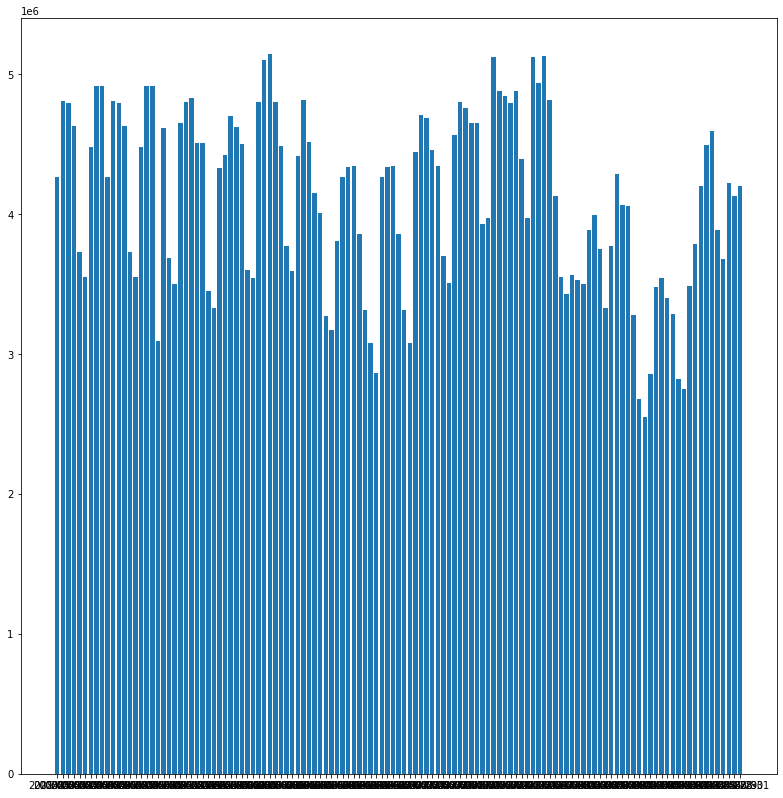

2005-05-01 4264251.619213
2005-05-02 4811797.6387559995
2005-05-03 4793110.243356
2005-05-04 4631164.089133
2005-05-05 3729794.215877
2005-05-06 3548721.5299420003
2005-05-07 4481423.908369001
2005-05-08 4914741.982361
2005-05-09 4914830.363146001
2005-05-10 4264251.619213
2005-05-11 4811797.6387559995
2005-05-12 4793110.243356
2005-05-13 4631164.089133
2005-05-14 3729794.215877
2005-05-15 3548721.5299420003
2005-05-16 4481423.908369001
2005-05-17 4914741.982361
2005-05-18 4914830.363146001
2005-05-19 3096071.881046
2005-05-20 4616169.015246
2005-05-21 3686237.8919249997
2005-05-22 3503397.895792
2005-05-23 4656325.122179
2005-05-24 4802840.053085
2005-05-25 4834693.0056920005
2005-05-26 4510662.537936999
2005-05-27 4510662.537936999
2005-05-28 3455446.422422
2005-05-29 3329653.5722069996
2005-05-30 4333954.832236
2005-05-31 4424958.172701
2005-06-01 4703513.402853
2005-06-02 4625447.623206
2005-06-03 4506176.1544780005
2005-06-04 3604800.327631
2005-06-05 3543739.567644
2005-06-06 480

In [91]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime


fig = plt.figure()
fig.set_size_inches(10.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])


x = [file[:-4]  for file in listdir(dbdfcperfect) if file.endswith(".csv") ]
y = [pd.read_csv(dbdfcperfect + "\\" +file )["TrafficamountinMB/S"].sum() for file in listdir(dbdfcperfect) if file.endswith(".csv")]


ax.bar(x,y)
plt.show()
for x,y in zip(x,y):
    print(x, y)



In [ ]:
######################################

In [1]:
#  this is the old function with 10 , 2,2 daays are ,missing in may-june-july devide by 15ns
def createFiles(jsonfilespath,dictionary_timed , path , granuality):
    
        for date, files in dictionary_timed.items():
            
            if granuality == 'day':    
                awrite = open( path + '\\' +  date[0:4]+ "-" + date[4:6]+ "-" + date[6:8] +  ".csv", "w")
            elif granuality == "week":
                awrite = open( path + '\\' +  date[0:4]+ "-" + date[4:6] + ".csv", "w")
            elif granuality == "month":
                awrite = open( path + '\\' +  month_code(date[0:3]) + ".csv", "w")
            
            awrite.write('From, To, Traffic amount in MB/S\n')

            for fifteen in files: 
                tree = ET.parse(jsonfilespath + '\\' + fifteen)
                root = tree.getroot()
                #print(root)

                for element in root[2]:
                    source_country  = switch_country(element[0].text)
                    destination_country  = switch_country(element[1].text)
                    awrite.write(source_country + ',' + destination_country + ',' + element[2].text + '\n')

            awrite.close()

In [14]:
# create a folder that has excel files day by day
createFiles(jsonfilespath,day_by_day_files , dpath , "day")

In [15]:
# create a folder that has excel files week by week
createFiles(jsonfilespath,week_by_week_files , wpath , "week")

In [6]:
# create a folder that has excel files month by month
createFiles(jsonfilespath,month_by_month_files , mpath , "month")

In [ ]:
for filename in listdir(path):  
        if filename.endswith(".csv"): 
             # print(os.path.join(directory, filename))
            df = pd.read_csv(path + "\\"+filename , header=None)

In [12]:
date = []
for filename in listdir(dbdfc9m2j2jfixoutliners): 
    if filename.endswith(".csv"): 
        df = pd.read_csv(r'C:\Users\TQ\Desktop\Thesis_Code\dbdfc9m2j2jfixoutliners' + "\\"+filename , header=None)
        date.append(filename[:len(filename) - 4])
            

In [83]:
def create_adj(granuality):
    path = "C:/Users/TQ/Desktop/Thesis_Code/{}".format(granuality)
    for filename in listdir(path):  
        if filename.endswith(".csv"): 
#             print(os.path.join(directory, filename))
            df = pd.read_csv(path + "\\"+filename , header=None)
            if len(df.columns) == 4:   
                df = df.iloc[: , 1:]
            
            new_header = df.iloc[0] #grab the first row for the header
            df = df[1:] #take the data less the header row
            df.columns = new_header #set the header row as the df header
            df.columns = ['Source', 'Target', 'Demand']
            df["Demand"] = df["Demand"].apply(pd.to_numeric)
            df['Source'] = df['Source'].astype(str)
            df['Target'] = df['Target'].astype(str)
            gb = df.groupby(['Source' , 'Target'])['Demand'].sum().to_dict()
            
            from_countries = []
            to_countries = []
            mb_countries = []
            from_countries2 = []
            to_countries2 = []        

            for key, item in gb.items():

                from_countries2.append(country_code(key[0])) 
                to_countries2.append(country_code(key[1]))
                from_countries.append(key[0]) 
                to_countries.append(key[1])
                mb_countries.append(item)

            pd.DataFrame([np.array(from_countries) , np.array(to_countries) , np.array(mb_countries)]).to_csv("C:/Users/TQ/Desktop/Thesis_Code/{}/adj_{}/adj_{}".format(granuality,granuality,filename))
            pd.DataFrame([np.array(from_countries2) , np.array(to_countries2) , np.array(mb_countries)]).to_csv("C:/Users/TQ/Desktop/Thesis_Code/{}/madj_{}/madj_{}".format(granuality,granuality,filename))
                                                                                                                                      
        else:
                print(filename + "is not csv file")

In [92]:
create_adj("dbdfcperfect") ; 

adj_dbdfcperfectis not csv file
madj_dbdfcperfectis not csv file


In [93]:
# this fills wbw folder (with missing filled)
weeknumber = 1 
for k,v in week_by_week_files.items():
    dfall = pd.DataFrame()
    
    for i,f in enumerate(v): 
        dfall = pd.concat([dfall , pd.read_csv(dbdfcperfect + "\\"+ f)], ignore_index=True)
    
    gb = dfall.groupby(['From' , 'To'])['TrafficamountinMB/S'].sum().reset_index()
    gb.to_csv(wbw + "\\"+ 'week{}.csv'.format(weeknumber))
    weeknumber += 1 

In [95]:
create_adj("wbw") ; 

adj_wbwis not csv file
madj_wbwis not csv file


In [96]:
# this fills mbm folder (with missing filled)
monthnumber = 1 
for k,v in month_by_month_files.items():
    dfall = pd.DataFrame()
    for i,f in enumerate(v): 
        dfall = pd.concat([dfall , pd.read_csv(dbdfcperfect + "\\"+ f)], ignore_index=True)
        
    gb = dfall.groupby(['From' , 'To'])['TrafficamountinMB/S'].sum().reset_index()
    gb.to_csv(mbm + "\\"+ 'month{}.csv'.format(monthnumber))
    monthnumber += 1    
     

In [97]:
 create_adj("mbm") 

adj_mbmis not csv file
madj_mbmis not csv file
